In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix

from  src.ML_functions import plot_model_metrics, plot_confusion_matrix

In [2]:
# Load Dataframe

df = pd.read_csv('Preprocessed_Data/Final_df.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,score,thumbsUpCount,accurate,add,ai,also,always,amazing,answer,anything,...,voice,want,way,well,wonderful,work,would,wow,sentiment,text_length
0,5,0,0.0,0.0,0.540835,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6369,4
1,5,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4404,2
2,5,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7096,3
3,1,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4215,1
4,4,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1372,9


# MODELLING

In [3]:
# Split df

X = df.drop(columns=['score'])
y = df['score'] - 1     # Mapping target column from [1,2,3,4,5] to [0,1,2,3,4]

print(f'Shape for X features set: {X.shape}')
print(f'Shape for y target column: {y.shape}')

Shape for X features set: (134416, 103)
Shape for y target column: (134416,)


In [4]:
# Initialize ML models

models = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
    
}

In [5]:
# Initialize Stratified K fold

k = 10

skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [6]:
# Dict to save metric evaluation scores

metrics = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'confusion_matrix']

model_metrics = {name : {metric : [] for metric in metrics} for name in models}


In [7]:
# Models training 

for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    print(f'Fold {i+1} evaluating...')

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print('-'*40)
    
    for name, model in models.items():

        print(f'{name} model training...')

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        model_metrics[name]['accuracy'].append(accuracy_score(y_test, y_pred))
        model_metrics[name]['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        model_metrics[name]['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        model_metrics[name]['f1'].append(f1_score(y_test, y_pred, average='weighted'))
        model_metrics[name]['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
        model_metrics[name]['confusion_matrix'].append(confusion_matrix(y_test, y_pred))

    print('-'*40)

Fold 1 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...
XGBoost model training...
----------------------------------------
Fold 2 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 3 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 4 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 5 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 6 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 7 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 8 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...
XGBoost model training...
----------------------------------------
Fold 9 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 10 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------


In [8]:
# Mean and Std for each evaluation metric and model

final_metrics = {name: {metric: (np.mean(scores), np.std(scores)) for metric, scores in metrics_dict.items()} for name, metrics_dict in model_metrics.items()}

for name, metrics_dict in final_metrics.items():

    print(f"\n{name} Performance Metrics:")
    for metric, (mean_score, std_score) in metrics_dict.items():

        if metric.capitalize() == 'Confusion_matrix':
            continue

        print(f"{metric.capitalize()} - Mean: {mean_score:.4f}, Std: {std_score:.4f}")


RandomForest Performance Metrics:
Accuracy - Mean: 0.7599, Std: 0.0015
Precision - Mean: 0.6526, Std: 0.0036
Recall - Mean: 0.7599, Std: 0.0015
F1 - Mean: 0.6914, Std: 0.0016
Balanced_accuracy - Mean: 0.2687, Std: 0.0036

LogisticRegression Performance Metrics:
Accuracy - Mean: 0.7712, Std: 0.0010
Precision - Mean: 0.6611, Std: 0.0251
Recall - Mean: 0.7712, Std: 0.0010
F1 - Mean: 0.6876, Std: 0.0013
Balanced_accuracy - Mean: 0.2554, Std: 0.0031

XGBoost Performance Metrics:
Accuracy - Mean: 0.7735, Std: 0.0012
Precision - Mean: 0.6638, Std: 0.0136
Recall - Mean: 0.7735, Std: 0.0012
F1 - Mean: 0.6940, Std: 0.0016
Balanced_accuracy - Mean: 0.2691, Std: 0.0032


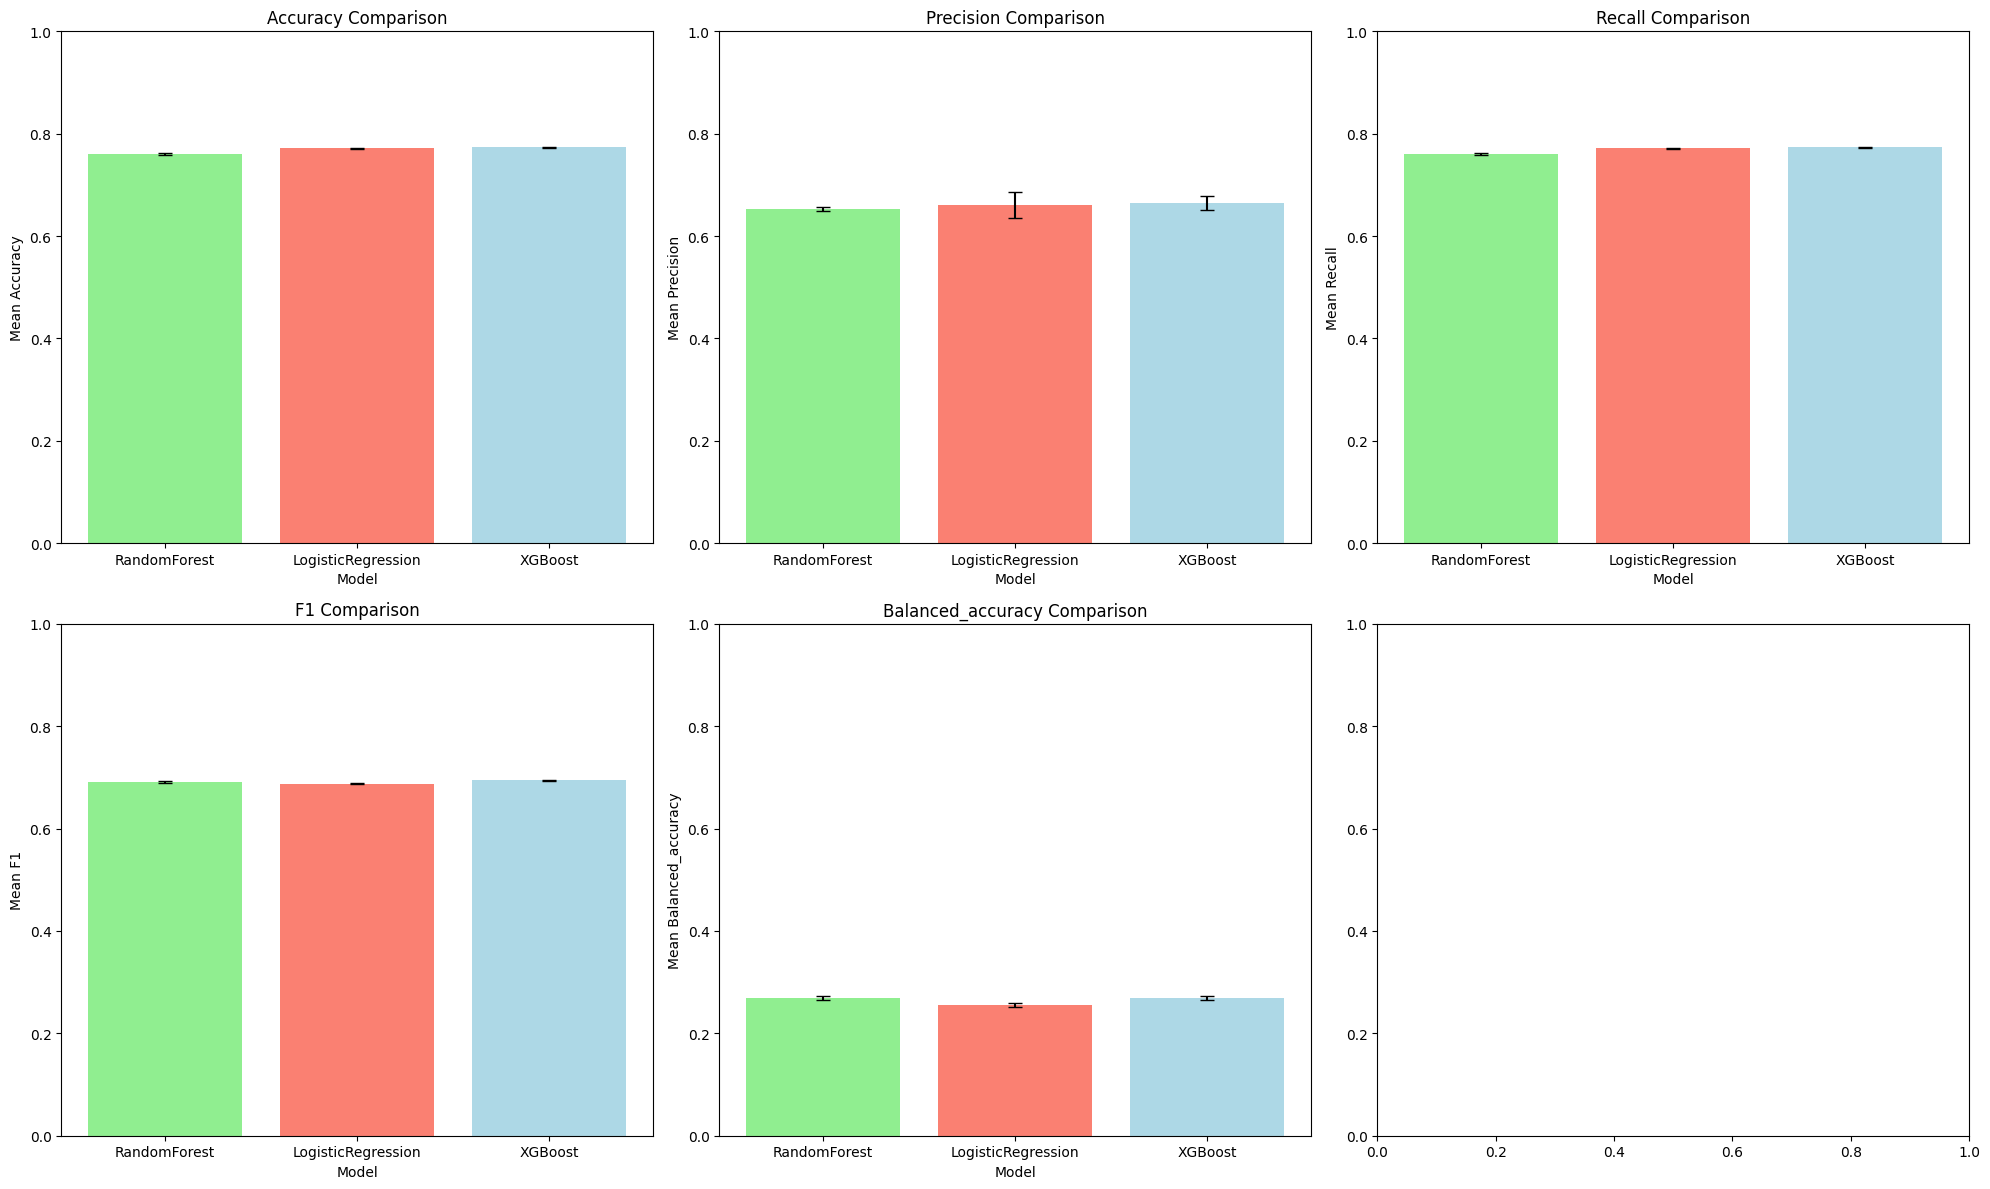

In [9]:
# Visualize and compare models results

plot_model_metrics(model_metrics, models, metrics)


In [13]:
np.mean(model_metrics['RandomForest']['confusion_matrix'], axis=0)

array([[2.8950e+02, 7.0000e+00, 1.0700e+01, 2.1500e+01, 5.1960e+02],
       [5.1500e+01, 1.2000e+00, 3.5000e+00, 6.2000e+00, 1.6660e+02],
       [6.0200e+01, 2.7000e+00, 5.1000e+00, 1.3100e+01, 4.7730e+02],
       [6.1500e+01, 3.5000e+00, 9.7000e+00, 3.3100e+01, 1.4751e+03],
       [1.4360e+02, 1.3200e+01, 4.0500e+01, 1.3970e+02, 9.8860e+03]])

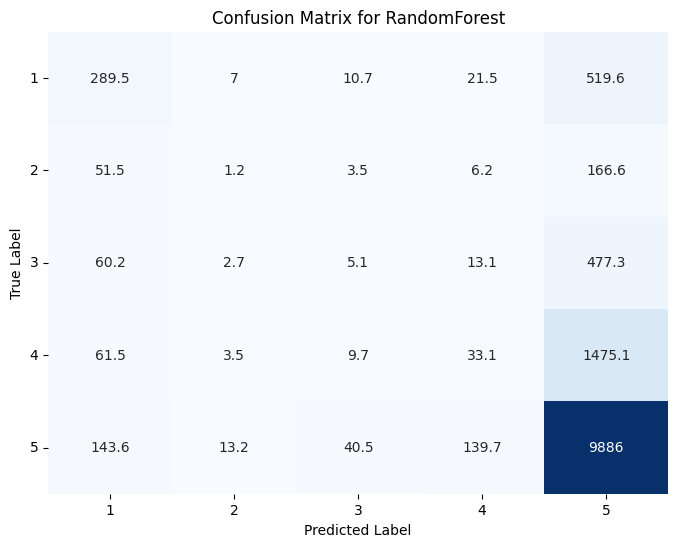

In [20]:
# Plot confusion matrix with mean values for a chosen model

chosen_model = 'RandomForest'

conf_matrix = np.mean(model_metrics[chosen_model]['confusion_matrix'], axis=0)

plot_confusion_matrix(conf_matrix, model_name = chosen_model)